# ema, sma, rsi

In [12]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt


In [38]:

input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values
length_data = len(close_price_data)
input_data["SMA_5"] = talib.SMA(close_price_data, timeperiod = 5)
input_data["EMA_10"] = talib.EMA(close_price_data, timeperiod= 10)
input_data["RSI_15"] = talib.RSI(close_price_data, timeperiod = 15)
input_data.to_csv("EMA_10 Values.csv")

latest_ema = input_data["EMA_10"].dropna()
latest_sma = input_data["SMA_5"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

print("Current Price:",latest_close_price)
print("Total Data:",length_data)
print("Total Length:\n",latest_ema)
print("Total Length:\n", latest_sma)


Current Price: 1233.0
Total Data: 129
Total Length:
 119    3012.810000
118    3015.771818
117    3010.349669
116    2995.677002
115    2982.808456
          ...     
4      1239.705385
3      1237.013496
2      1234.901952
1      1233.547051
0      1233.447587
Name: EMA_10, Length: 120, dtype: float64
Total Length:
 124    3003.93
123    3003.78
122    3012.90
121    3016.76
120    3018.22
        ...   
4      1227.68
3      1221.93
2      1220.04
1      1222.22
0      1225.60
Name: SMA_5, Length: 125, dtype: float64


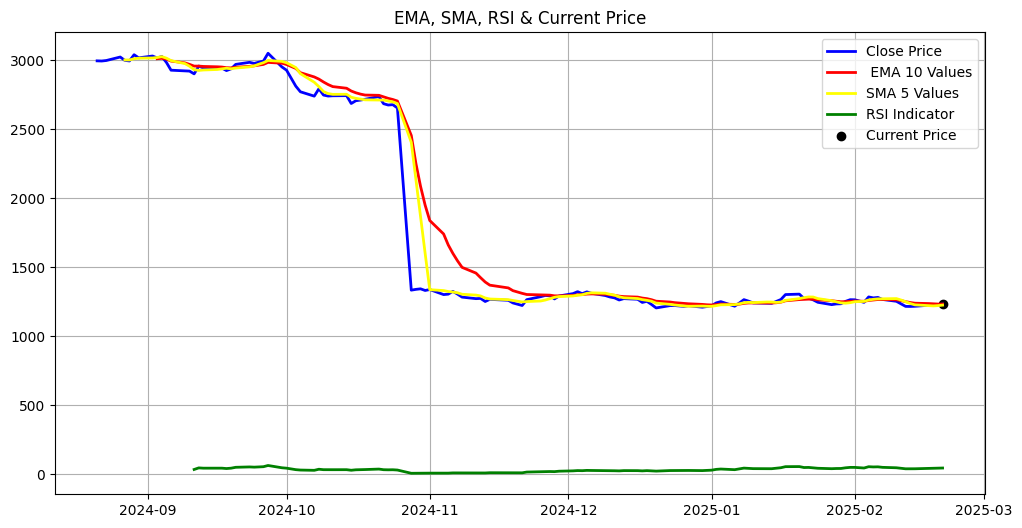

In [14]:
plt.figure(figsize=(12,6))
plt.plot(input_data["Date"], input_data["Close"], label = "Close Price", color = "blue", linewidth = 2)
plt.plot(input_data["Date"], input_data["EMA_10"], label = " EMA 10 Values", color = "red", linewidth = 2)
plt.plot(input_data["Date"], input_data["SMA_5"], label = "SMA 5 Values", color = "yellow", linewidth = 2)
plt.plot(input_data["Date"], input_data["RSI_15"], label = "RSI Indicator", color = "green",linewidth = 2)
plt.scatter(input_data["Date"].iloc[-1], input_data["Close"].iloc[-1], label = "Current Price", color = "black")
plt.xlabel = "Date"
plt.ylabel = "Price"
plt.title("EMA, SMA, RSI & Current Price")
plt.legend()
plt.grid()
plt.show()


# infosys 1year data 

In [15]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt


In [29]:

input_data = pd.read_csv("INFY-EQ-24-02-2024-to-24-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values
length_close_price_data = len(close_price_data)

input_data["SMA_10"] = talib.SMA(close_price_data, timeperiod = 10)
input_data["EMA_50"] = talib.EMA(close_price_data, timeperiod= 50)
input_data["RSI_14"] = talib.RSI(close_price_data, timeperiod = 14)

latest_ema = input_data["EMA_50"].dropna()
latest_sma = input_data["SMA_10"].dropna()
latest_rsi = input_data["RSI_14"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

input_data.to_csv("EMA_50 Values.csv")
input_data.to_csv("SMA_10 Values.csv")
input_data.to_csv("RSI Indicators.csv")


print("Current Price: ",latest_close_price)
print("Close_price_Length:\n",length_close_price_data)
print("Latest Ema Length:\n",latest_ema)
print("Latest SMA Length:\n",latest_sma)
print("RSI Indicators Length:\n",latest_rsi)

Current Price:  1815.0
Close_price_Length:
 249
Latest Ema Length:
 199    1518.944000
198    1515.199137
197    1511.650151
196    1508.054067
195    1505.908810
          ...     
4      1884.089464
3      1882.829093
2      1880.004423
1      1877.853269
0      1875.388435
Name: EMA_50, Length: 200, dtype: float64
Latest SMA Length:
 239    1645.760
238    1639.805
237    1634.740
236    1628.755
235    1626.695
         ...   
4      1877.620
3      1872.935
2      1864.310
1      1855.260
0      1846.395
Name: SMA_10, Length: 240, dtype: float64
RSI Indicators Length:
 234    43.024807
233    36.458315
232    29.982105
231    29.103742
230    29.068469
         ...    
4      43.170990
3      45.260328
2      38.722555
1      41.875650
0      40.296223
Name: RSI_14, Length: 235, dtype: float64


In [39]:
def find_swing_points(data, window=5):
    support_levels = []
    resistance_levels = []
    for i in range(window, len(data) - window):
        current_price = data["Close"].iloc[i]
        window_before = data["Close"].iloc[i - window:i]
        window_after = data["Close"].iloc[i + 1:i + window + 1]
        if current_price < min(window_before) and current_price < min(window_after):
            support_levels.append((data["Date"].iloc[i], current_price))
            
        if current_price > max(window_before) and current_price > max(window_after):
            resistance_levels.append((data["Date"].iloc[i], current_price))
    
    return support_levels, resistance_levels

support_levels, resistance_levels = find_swing_points(input_data, window=5)

print("Support Levels:")
for date, price in support_levels:
    print(f"Date: {date.strftime('%Y-%m-%d')}, Price: {price}")

print("Resistance Levels:")
for date, price in resistance_levels:
    print(f"Date: {date.strftime('%Y-%m-%d')}, Price: {price}")

Support Levels:
Date: 2024-09-11, Price: 2903.0
Date: 2024-10-07, Price: 2741.45
Date: 2024-11-21, Price: 1223.0
Date: 2024-12-20, Price: 1205.3
Date: 2025-01-14, Price: 1238.75
Date: 2025-01-27, Price: 1229.35
Date: 2025-02-13, Price: 1216.1
Resistance Levels:
Date: 2024-08-29, Price: 3041.85
Date: 2024-09-27, Price: 3052.35
Date: 2024-12-03, Price: 1323.3
Date: 2025-01-08, Price: 1265.5
Date: 2025-01-20, Price: 1305.45
Date: 2025-02-04, Price: 1285.2


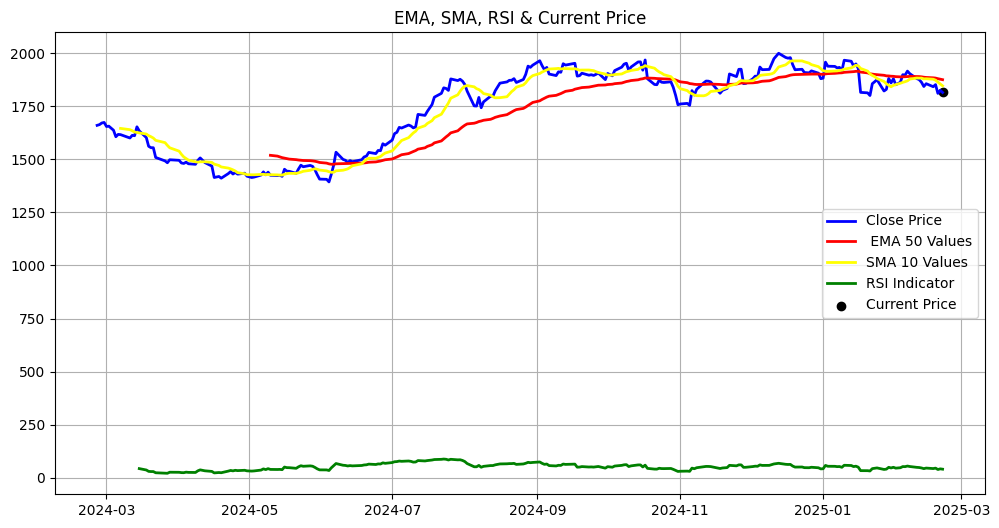

In [23]:
plt.figure(figsize=(12,6))
plt.plot(input_data["Date"], input_data["Close"], label = "Close Price", color = "blue", linewidth = 2)
plt.plot(input_data["Date"], input_data["EMA_50"], label = " EMA 50 Values", color = "red", linewidth = 2)
plt.plot(input_data["Date"], input_data["SMA_10"], label = "SMA 10 Values", color = "yellow", linewidth = 2)
plt.plot(input_data["Date"], input_data["RSI_14"], label = "RSI Indicator", color = "green",linewidth = 2)
plt.scatter(input_data["Date"].iloc[-1], input_data["Close"].iloc[-1], label = "Current Price", color = "black")
plt.xlabel = "Date"
plt.ylabel = "Price"
plt.title("EMA, SMA, RSI & Current Price")
plt.legend()
plt.grid()
plt.show()
